In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
LEASE = 3000
get_timestamp = lambda time_str: datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S').timestamp()

# Completed Chameleon Lease

In [12]:
completed_lease = pd.read_csv('complete_lease.csv')
start_time = completed_lease[completed_lease['completed']==0]['Time'].iloc[0]
end_time = completed_lease[completed_lease['completed']==LEASE]['Time'].iloc[0]
start_time, end_time

('2021-07-29 18:44:05', '2021-07-29 18:58:40')

# OSG Job Execution Cost

In [13]:
base_osg_jobs = pd.read_csv('osg_jobs.csv')
base_osg_jobs = base_osg_jobs.dropna()
base_osg_jobs = base_osg_jobs[base_osg_jobs['action'] == 'stop']
base_osg_jobs = base_osg_jobs[base_osg_jobs['JobSimCompleteDate'] < get_timestamp(end_time)]
del base_osg_jobs['_id']
base_osg_jobs = base_osg_jobs[(base_osg_jobs['TotalCost'] > 0) & (base_osg_jobs['WastedCost'] >= 0)]

In [14]:
base_osg_jobs.shape

(53560, 27)

In [15]:
base_osg_jobs['ResubmitCount'].value_counts()

0    47764
1     5217
2      507
3       60
4       12
Name: ResubmitCount, dtype: int64

In [16]:
base_osg_jobs[['TotalCost', 'WastedCost']].describe()

,TotalCost,WastedCost
count,53560.000000,53560.000000
mean,6.227533,0.255726
std,2.570760,1.839784
min,0.001765,0.000000
25%,5.328507,0.000000
50%,6.220670,0.000000
75%,7.182562,0.000000
max,160.950361,152.784727


# Resource Utilization

In [17]:
node_term = pd.read_csv('node_terminations.csv')
node_term['Time'] = pd.to_datetime(node_term['Time'])
node_term = node_term[node_term['Time'] <= end_time]
node_term.dropna(inplace=True)
node_term.max()

Time                     2021-07-29 18:58:40
unused terminations                      751
success termination                     1437
immediate termination                   1445
dtype: object

In [18]:
ru = pd.read_csv('utlization_rate.csv')
ru['Time'] = pd.to_datetime(ru['Time'])
ru = ru[ru['Time'] <= end_time]
ru = ru[ru['Chameleon Utl Rate'] != 0]
ru.set_index(['Time'], inplace=True)

<AxesSubplot:xlabel='Time'>

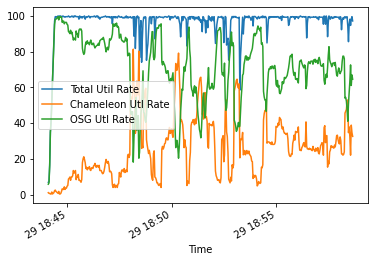

In [19]:
ru.plot()

In [20]:
ru.describe()

,Total Util Rate,Chameleon Utl Rate,OSG Utl Rate
count,436.000000,436.000000,436.000000
mean,96.745023,26.115264,70.982133
std,9.789601,16.800330,18.054102
min,6.930000,0.365000,5.840000
25%,98.575000,12.800000,60.625000
50%,99.300000,24.900000,73.300000
75%,99.600000,34.875000,85.400000
max,100.000000,81.400000,99.600000
